# SI 618: Data Manipulation and Analysis
## 05 - Correlation, Regression, and ANOVA (and a t-test)

### Dr. Chris Teplovs, School of Information, University of Michigan
Copyright &copy; 2024.  This notebook may not be shared outside of the course without permission.

Version 2024.02.07.5.CT

## Outline of today's class
1. Announcements
   1. Project part I due date extended to 2/21
2. Questions about the material so far?
3. Coding basics
4. "Lecture" on Correlation, Regression, and ANOVA
5. Break
6. Coding exercises

## Coding basics

### Function parameters and arguments

Parameters are placeholders defined in the function declaration, while arguments are the actual values passed to the function when it is called. Parameters receive arguments when the function is invoked, allowing the function to operate on the supplied data.

Functions can take zero or more parameters.  For example, the `print()` function takes zero or more arguments.  The `print()` function has a parameter called `end` that defaults to `'\n'`.  You can override the default by providing an argument to the `end` parameter.


In [201]:
print('Hello', end=' ')
print('World')

Hello World



### Positional and keyword arguments

Arguments can be passed to a function by position or by keyword.  Positional arguments are assigned to parameters in the order they are listed in the function definition.  Keyword arguments are assigned to parameters by name.


In [202]:
def greet(name, greeting):
    print(f'{greeting}, {name}!')

greet('Chris', 'Hello') # Positional arguments
greet(greeting='Hello', name='Chris') # Keyword arguments
greet('Chris', greeting='Hello') # Mixed arguments

Hello, Chris!
Hello, Chris!
Hello, Chris!


In [203]:
greet(name='Chris', 'Hello') # Error

SyntaxError: positional argument follows keyword argument (2053557826.py, line 1)

### Default parameter values

You can provide default values for parameters in a function definition.  If a default value is provided, the parameter is optional.  If a default value is not provided, the parameter is required.


In [ ]:
def greet(name, greeting='Hello'):
    print(f'{greeting}, {name}!')

greet('Chris') # Hello, Chris!
greet('Chris', 'Hi') # Hi, Chris!

Hello, Chris!
Hi, Chris!



### Variable-length argument lists

You can define functions that take a variable number of arguments.  There are two ways to do this: using the `*args` and `**kwargs` constructs.

The `*args` construct is used to pass a variable number of positional arguments to a function.  The `*args` construct is a tuple containing the positional arguments.


In [ ]:
def add(*args):
    return sum(args)

print(add(1, 2, 3)) # 6
print(add(1, 2, 3, 4, 5)) # 15

6
15



The `**kwargs` construct is used to pass a variable number of keyword arguments to a function.  The `**kwargs` construct is a dictionary containing the keyword arguments.


In [ ]:
def greet(**kwargs):
    for key, value in kwargs.items():
        print(f'{key}: {value}')

greet(name='Chris', greeting='Hello') # name: Chris, greeting: Hello
greet(name='Chris', greeting='Hello', age=21) # name: Chris, greeting: Hello, age: 21

name: Chris
greeting: Hello
name: Chris
greeting: Hello
age: 21


### Unpacking argument lists

You can use the `*` and `**` operators to unpack argument lists when calling a function.


In [ ]:
def add(a, b, c):
    return a + b + c

In [ ]:
args = [1, 2, 3]
add(*args)

6

In [ ]:
kwargs = {'a': 1, 'b': 2, 'c': 3}
add(**kwargs)

6

### Challenge: 
Write a function called `print_args` that takes a variable number of positional arguments and a variable number of keyword arguments and prints them.  The function should print the positional arguments in the order they were passed and the keyword arguments in the order they were passed.  The function should return the number of positional arguments and the number of keyword arguments passed to it.  Test your function with a variety of positional and keyword arguments.


In [ ]:
def print_args(*args, **kwargs):
    print(args)
    print(kwargs)

print_args(1, 3, 2, name='Chris', greeting='Hello', age=21)

(1, 3, 2)
{'name': 'Chris', 'greeting': 'Hello', 'age': 21}



### Lambda functions

Lambda functions are small, anonymous functions that can have any number of parameters, but can only have one expression.  Lambda functions are defined using the `lambda` keyword.


In [ ]:
add = lambda a, b: a + b # only one expression on the right side of the colon
add(1, 2)

3

## Background

Correlation does not imply causation!

![](https://timoelliott.com/blog/wp-content/uploads/2023/10/every-single-person-who-confuses-correlation-and-causation-ends-up-dying.jpg)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Wine quality
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home


Let's load the wine quality dataset:

In [ ]:
wine = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We can create a pairplot for the wine dataset:

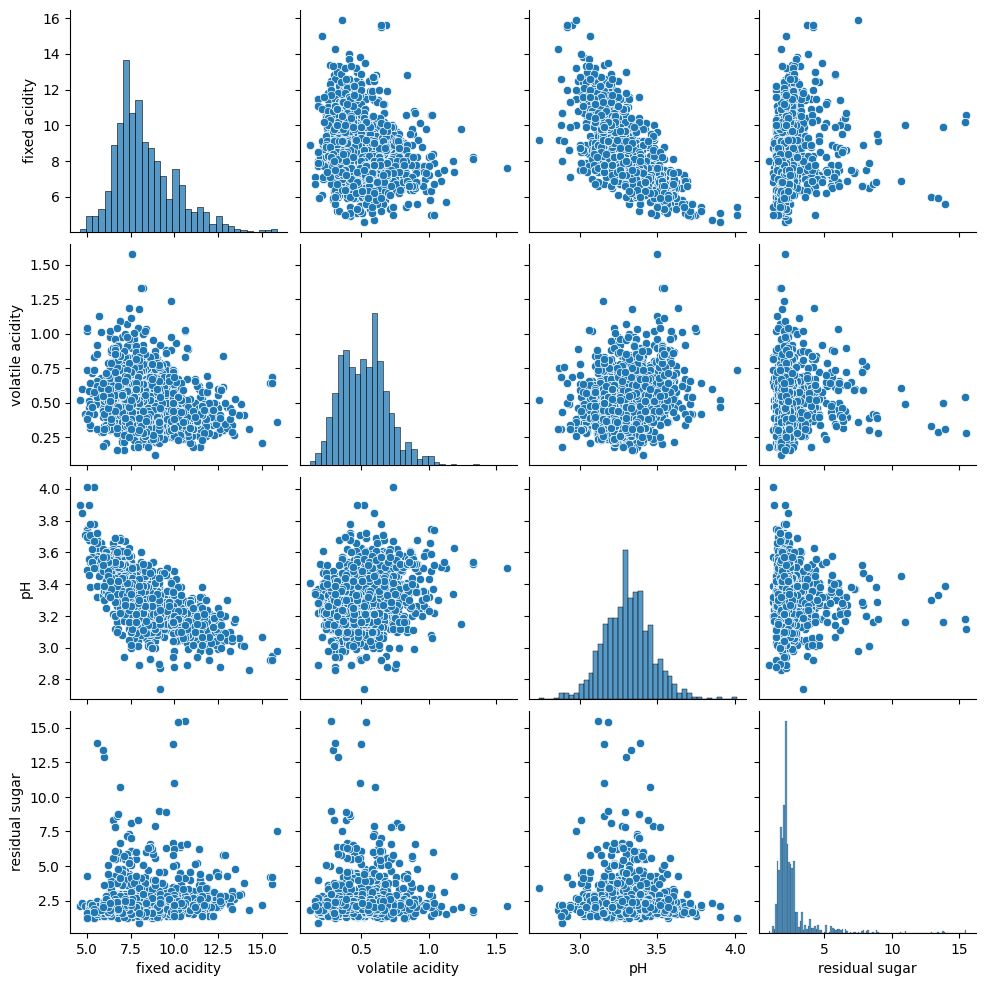

In [ ]:
sns.pairplot(wine,vars = ['fixed acidity','volatile acidity','pH','residual sugar'])

## Correlation

We can also look at the correlation between those variables.  From [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence):
> In the broadest sense correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other...
> Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.

Correlation coefficient can range from -1 to 1 and represent the degree to which and how
two variables are related.  Here's a visualization of a range of correlation coefficients:

![](https://github.com/umsi-data-science/si370/raw/master/resources/correlation1-1.png)

## Calculating (Pearson's) correlation coefficients
(From https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)

$\rho_{xy}$ = $\text{Cov}(x,y) \over (\sigma_x \sigma_y)$

where Cov $(x,y)$ is the covariance of $x$ and $y$ and $\sigma_x$ and $\sigma_y$ are the standard deviations of $x$ and $y$.  The covariance is defined as:

$\text{Cov}(x,y) = { {\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})} \over n}$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$.

The correlation coefficient may be calculated accoring to the formula:

$r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$

where $x_i$ and $y_i$ are the individual values of $x$ and $y$ and $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$.  The formula can also be expressed as:

$r = \frac{n \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{\sqrt{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2} \sqrt{n \sum_{i=1}^n y_i^2 - (\sum_{i=1}^n y_i)^2}}$

In [ ]:
# to calculate all possible correlation coefficients in a DataFrame
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


A heatmap is a really useful visualization technique for large correlation matrices:

<Axes: >

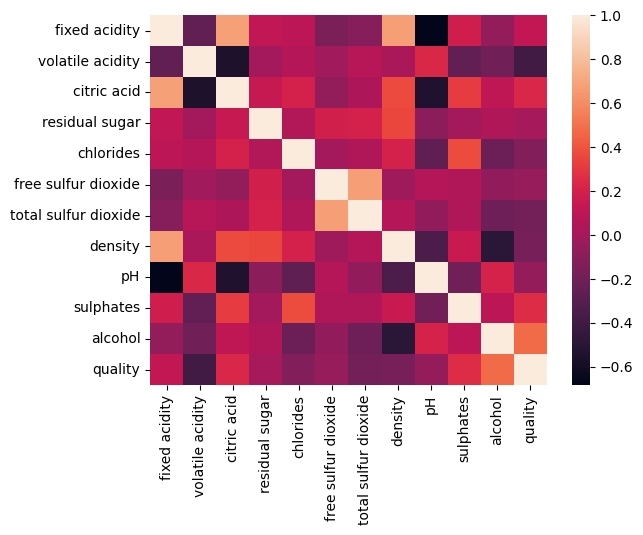

In [ ]:
sns.heatmap(wine.corr())  # do not use this simple form in any of your work!

The choice of color palette for heatmaps is important.  We want to use a diverging color map that has the correct "end" points and "center" point.  Check out https://seaborn.pydata.org/tutorial/color_palettes.html#diverging-color-palettes for more information.

<Axes: >

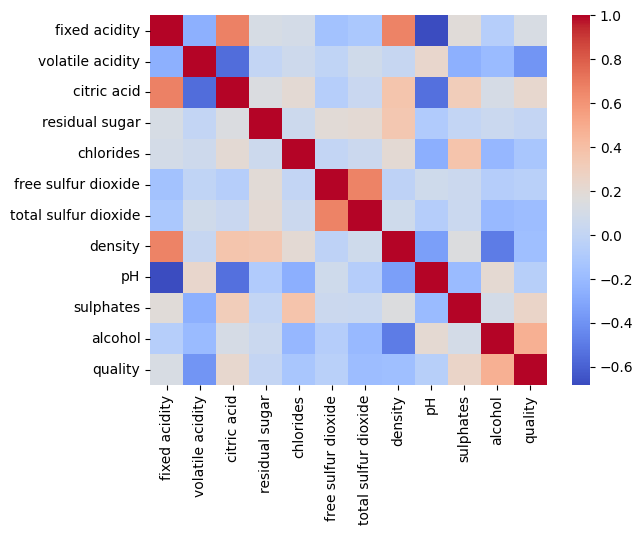

In [ ]:
sns.heatmap(wine.corr(),cmap="coolwarm") # better, but still not great

<Axes: >

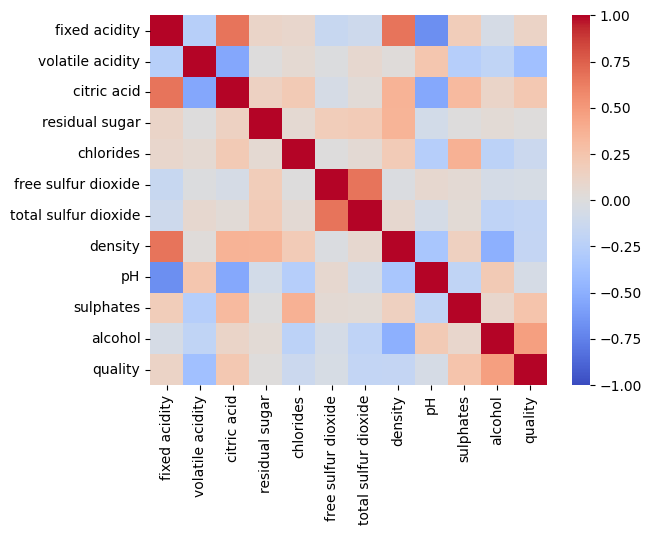

In [ ]:
sns.heatmap(wine.corr(),cmap="coolwarm",vmax=1,vmin=-1)

We can annotate the heatmap with the correlation coefficients.  This is a little tricky because we want to center the annotation on the cell and we want to use a different color for the annotation.  We can use the `fmt` parameter to `heatmap` to format the annotations.  We can also use the `annot_kws` parameter to `heatmap` to specify the font size and color for the annotations.

<Axes: >

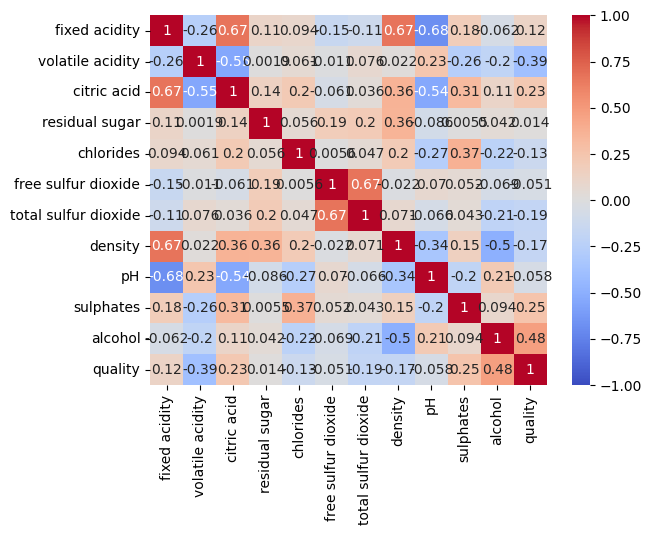

In [ ]:
sns.heatmap(wine.corr(),cmap="coolwarm",vmax=1,vmin=-1,annot=True) # more info, but difficult to read

<Axes: >

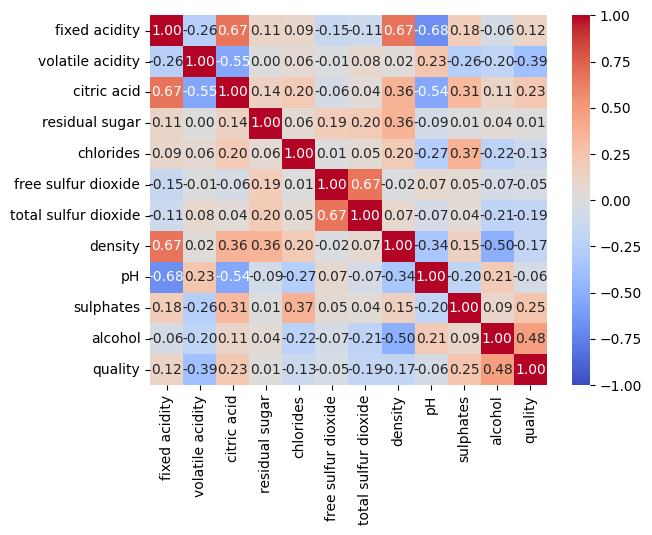

In [ ]:
sns.heatmap(wine.corr(),cmap="coolwarm",vmax=1,vmin=-1,annot=True, fmt=".2f")

<Axes: >

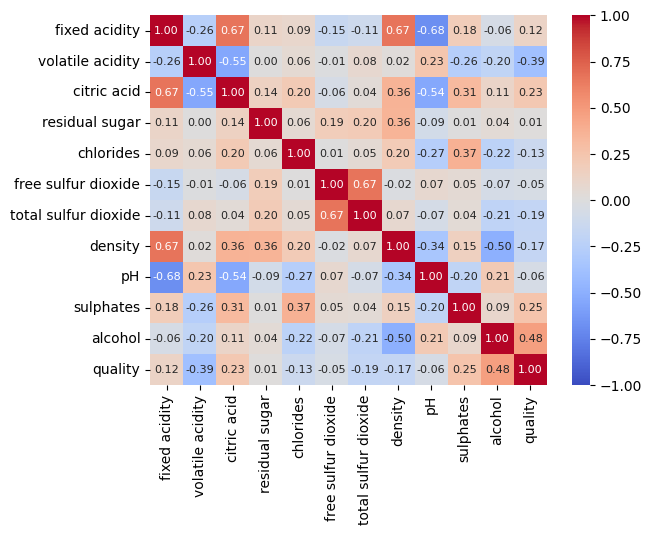

In [ ]:
# a nicely tuned heatmap
sns.heatmap(wine.corr(),cmap="coolwarm",vmax=1,vmin=-1,annot=True, fmt=".2f", annot_kws={"size": 8})

Recall we used JointGrid to create a regplot and histplot on the same plot.  We can take a 
closer look at that now:

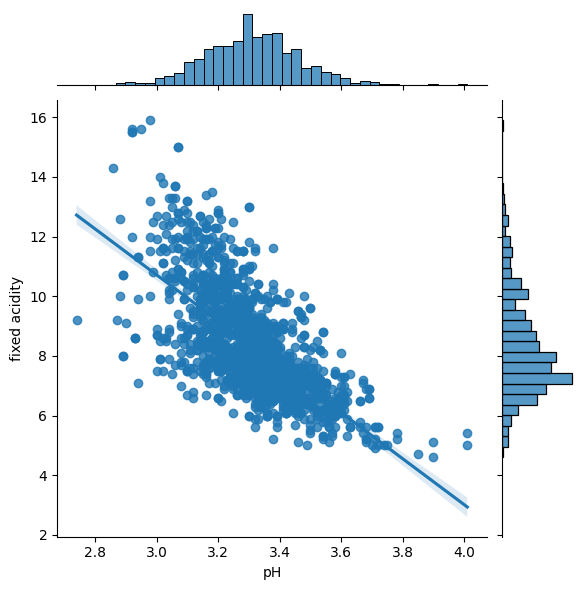

In [ ]:
g = sns.JointGrid(data=wine,x='pH',y='fixed acidity')
g = g.plot(sns.regplot, sns.histplot)

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Recall that a linear regression seeks to express the relationship between two variables as a linear combination of the variables:

$y = \beta_0 + \beta_1 x + \epsilon$

where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon$ is the error term.  The error term is the difference between the observed value of the dependent variable and the value predicted by the model.  The error term is assumed to be normally distributed with a mean of 0 and a constant variance.

The goal of linear regression is to find the values of $\beta_0$ and $\beta_1$ that minimize the sum of the squared errors.  This is called the "ordinary least squares" (OLS) criterion.


We can use the sums of squared terms to calculate the slope and intercept:

$\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

$\beta_0 = \bar{y} - \beta_1 \bar{x}$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$.

Expressed differently:

$\beta_1 = \frac{n \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}$




We can use the `statsmodels` library to perform OLS regression.  The `statsmodels` library provides a formulaic interface to linear regression that is similar to R.  The formulaic interface allows us to specify the regression model using a string that looks like:

`'dependent_variable ~ independent_variable'`

Note, however, that the formulaic interface does not allow for interaction terms or higher order terms (we can use the `sm.OLS` class to specify the model in a more flexible way).  Note too that variable names that have spaces in them must be enclosed in the `Q` operator.

In [ ]:
model0 = smf.ols("pH ~ Q('fixed acidity')", data=wine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1396.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          4.06e-220
Time:                        14:42:57   Log-Likelihood:                 1221.3
No. Observations:                1599   AIC:                            -2439.
Df Residuals:                    1597   BIC:                            -2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8150      0.014    276.927      0.000       3.788       3.842
Q('fixed acidity')    -0.0606      0.002    -37.366      0.000      -0.064      -0.057
==============================================================================
Omnibus:                       58.659   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.337
Skew:                          -0.155   Prob(JB):                     7.49e-32
Kurtosis:                       4.434   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above example, the $r^2$ value is 0.466, which means the model explains about 46.6% of the variance (which isn't bad).  However, the model is statistically significant (the p-value, called "Prob (F-statistic)" in the output, is less than 0.05).
The estimates for the parameters of the model are also statistically significant, which means we can use the equation:

`pH = 3.8150 + (-0.0606) * fixed acidity`

or

`pH = 3.8150 - 0.0606 * fixed acidity`

to predict the value of pH given a value for fixed acidity.

We can assess the goodness of fit of the model in several ways.  One way is to look at the residuals (the difference between the observed value and the predicted value).  We can use the `residplot` function to plot the residuals against the predicted values. Note that `residplot` is just a shortcut for an annotated scatterplot. We can also use the `qqplot` function to plot the residuals against a normal distribution.  We can use the `influence_plot` function to plot the leverage of each observation.  We can use the `plot_regress_exog` function to plot the regression results for each independent variable.

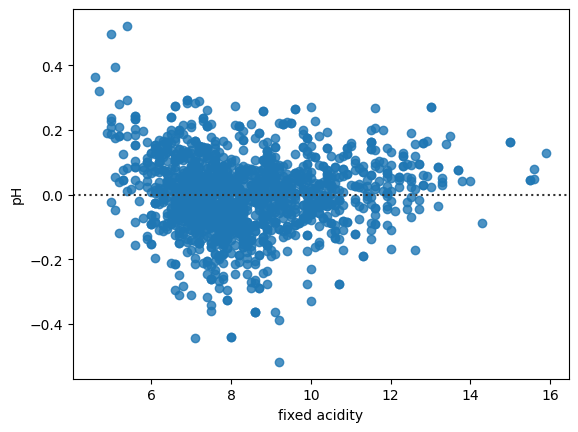

In [ ]:
residplot = sns.residplot(x='fixed acidity',y='pH',data=wine)

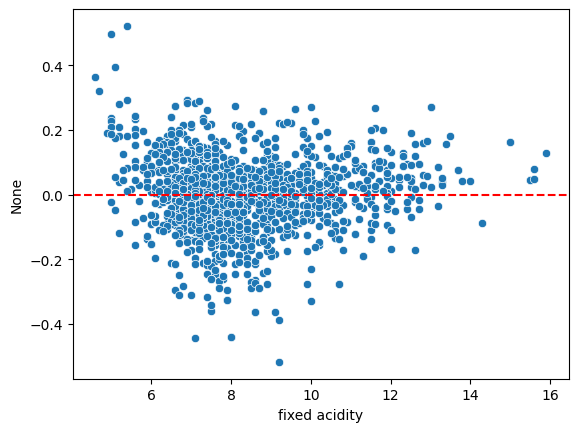

In [ ]:
sns.scatterplot(x=wine['fixed acidity'],y=model0.resid)
plt.axhline(0, color='r', linestyle='--')
plt.show()

We can take a look at the distribution of residuals to see if they are normally distributed.  This is important because the OLS regression model assumes that the residuals are normally distributed.  This is a way to check to see if that assumption is met.

We can  use a histogram to visualize the distribution of the residuals. 

<Axes: ylabel='Count'>

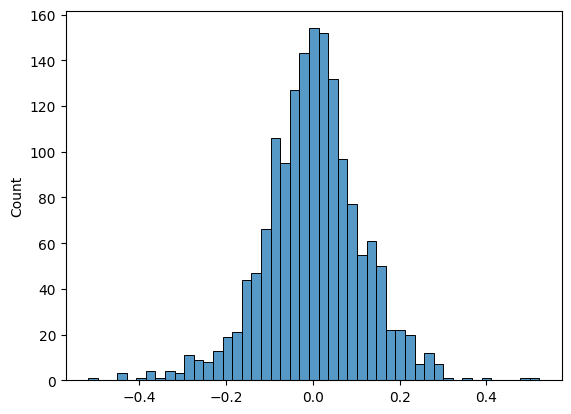

In [ ]:
sns.histplot(model0.resid)

We can also use a Q-Q plot to do this.  A Q-Q plot is a plot of the quantiles of the residuals against the quantiles of a normal distribution.  If the residuals are normally distributed, the points in the Q-Q plot will fall along a straight line.  We can use the `qqplot` function from `statsmodels.graphics.gofplots` to create a Q-Q plot.


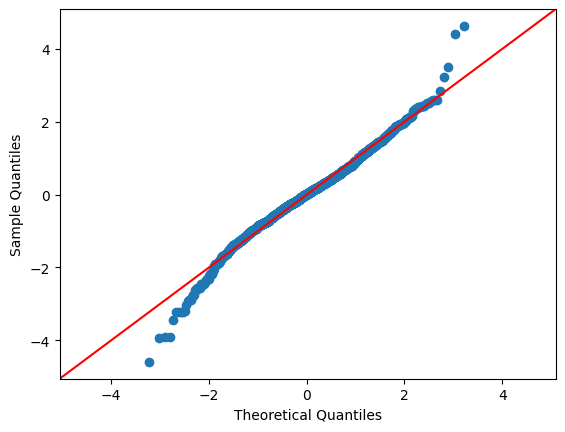

In [ ]:
from statsmodels.graphics.gofplots import qqplot
_ = qqplot(model0.resid, line='45', fit=True)

## Outlier detection

"Outlier detection" refers to the identification of points that are extreme in value.  They may or may not influence the regression analysis.

**Outlier**: Large residual (i.e. big differences on the vertical dimension)

**Leverage point**: Extreme value of predictor variable (i.e. big differences on the horizontal dimension)

**Influence point**: Removing observation substantially changes estimate of coefficients


Consider the following cases, drawn from 

http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

In the first case, there are no notable points:

In [ ]:
np.random.seed(0) # seed the random number generator so we always get the same results
x1 = np.random.normal(20, 3, 20)    # create a random normal distribution of 20 points,
                                    # centered on 20, standard deviation of 20
y0 = 5 + 0.5 * x1 # create a corresponding y variable that is exactly 5 + 0.5 * x
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)  # create a corresponding y variable that is 5 + 0.5 * x
                                                # plus some random noise drawn from a normal distribution
demo = pd.DataFrame({'x1':x1, 'y0':y0, 'y1':y1})
demo.head()

,x1,y0,y1
0,25.292157,17.646079,15.093089
1,21.200472,15.600236,16.253854
2,22.936214,16.468107,17.332543
3,26.722680,18.361340,17.619175
4,25.602674,17.801337,20.071092


In [ ]:
lm = sm.OLS(y1, sm.add_constant(x1)).fit()
lm1 = smf.ols("y1 ~ x1", data=demo).fit()
print("The rsquared value is " + str(lm.rsquared))


The rsquared value is 0.5759696028216693


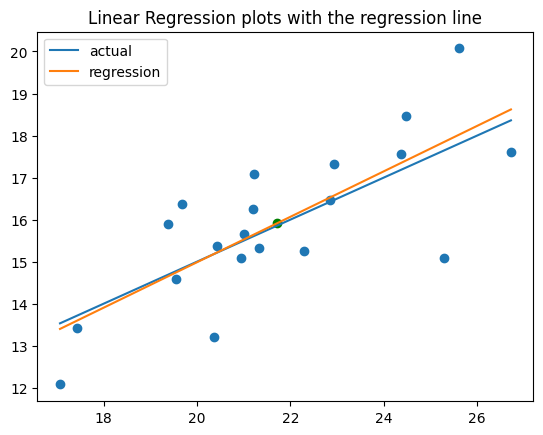

In [ ]:
plt.scatter(np.sort(demo.x1), demo.y1[np.argsort(demo.x1)])
plt.scatter(np.mean(demo.x1), np.mean(demo.y1), color = "green")
plt.plot(np.sort(demo.x1), demo.y0[np.argsort(demo.x1)], label = "actual")
plt.plot(np.sort(demo.x1), lm.predict()[np.argsort(demo.x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

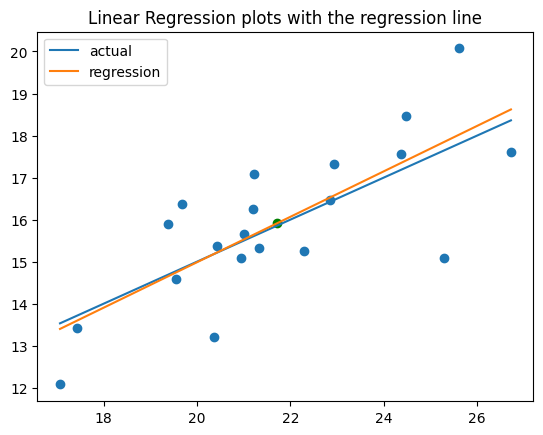

In [ ]:
# equivalently, without using DataFrames
plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

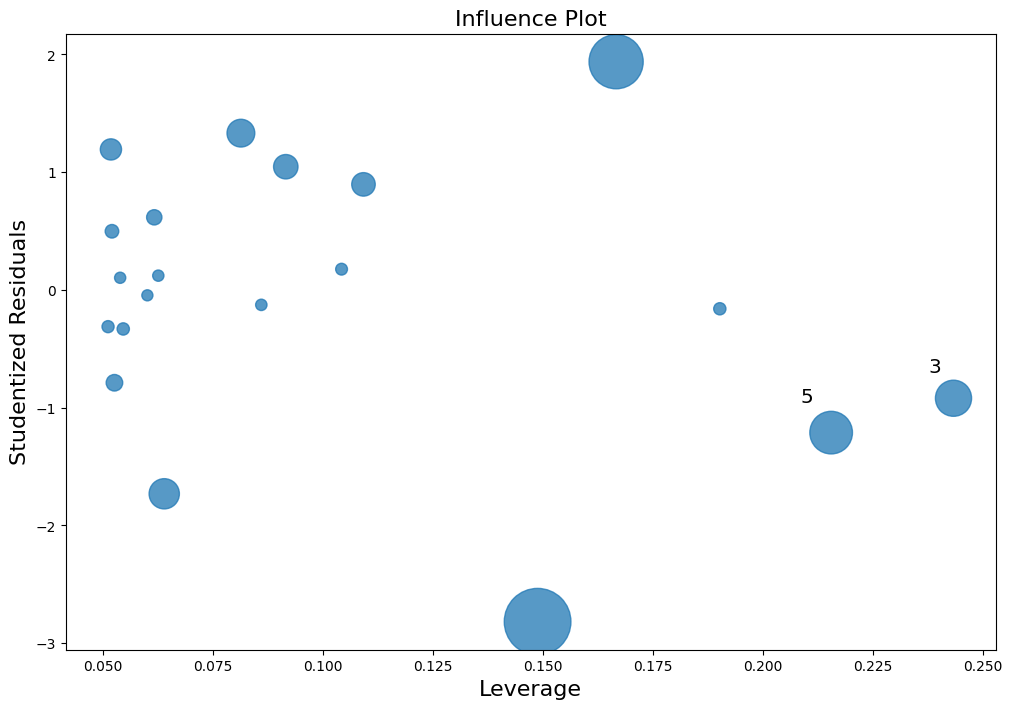

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.00005, ax = ax, criterion="cooks")

High leverage point, no outliers

The rsquared value is 0.6835270587597563


[]

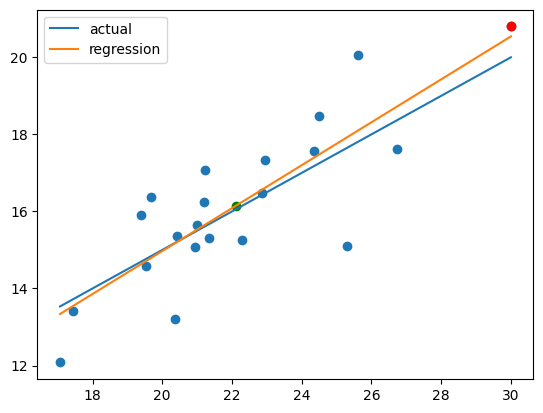

In [ ]:
x2 = np.r_[x1, 30]
y2 = np.r_[y1, 20.8]
y20 = np.r_[y0, 20]

lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print("The rsquared value is " + str(lm2.rsquared))

plt.scatter(np.sort(x2), y2[np.argsort(x2)])
plt.scatter(30, 20.8, color = "red")
plt.scatter(np.mean(x2), np.mean(y2), color = "green")
plt.plot(np.sort(x2), y20[np.argsort(x2)], label = "actual")
plt.plot(np.sort(x2), lm2.predict()[np.argsort(x2)], label = "regression")
plt.legend()
plt.plot()


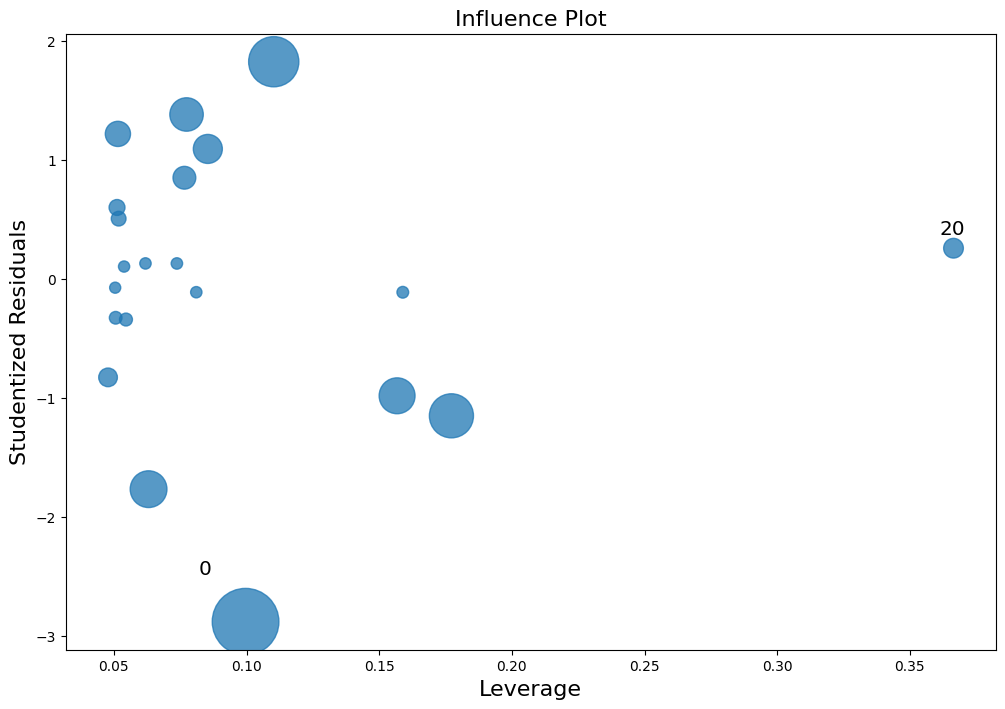

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, ax= ax, criterion="cooks")

Outlier, no leverage

The rsquared value is 0.27377526628015136


[]

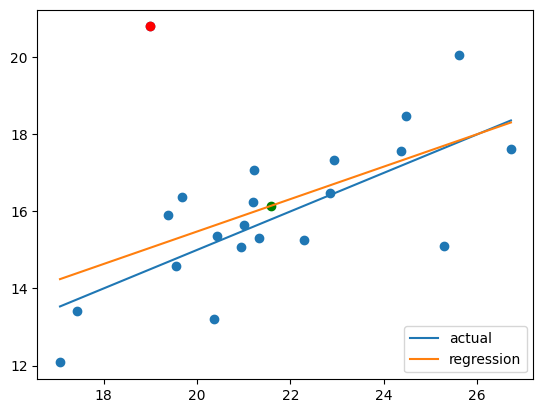

In [ ]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print("The rsquared value is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

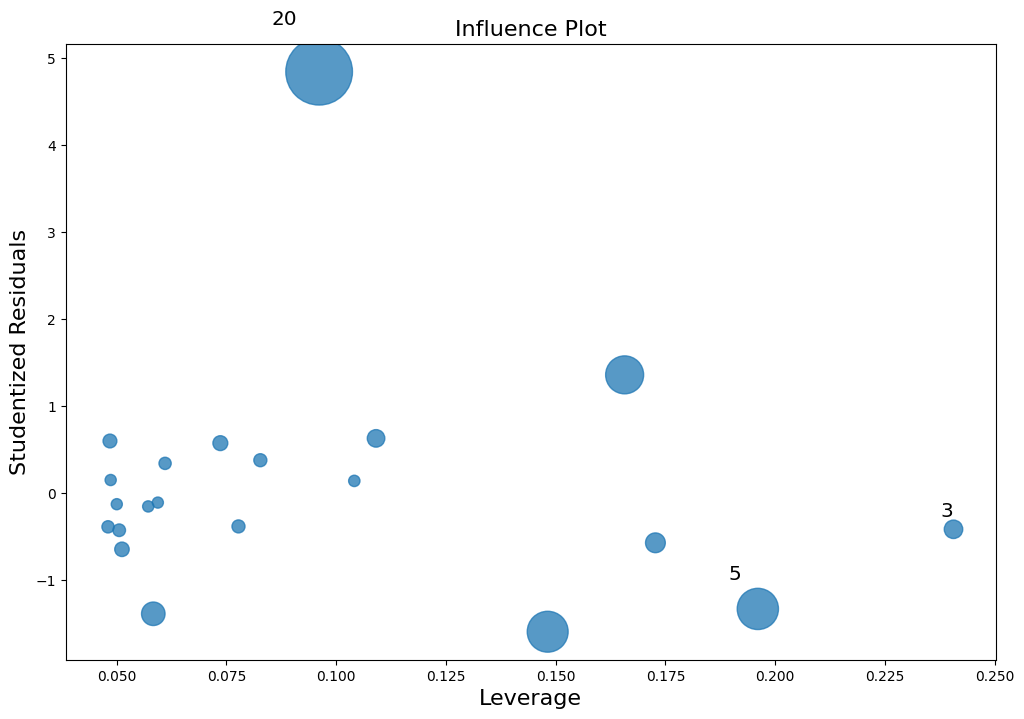

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

Outlier and leverage point

The rsquared value is 0.028865535723009872


[]

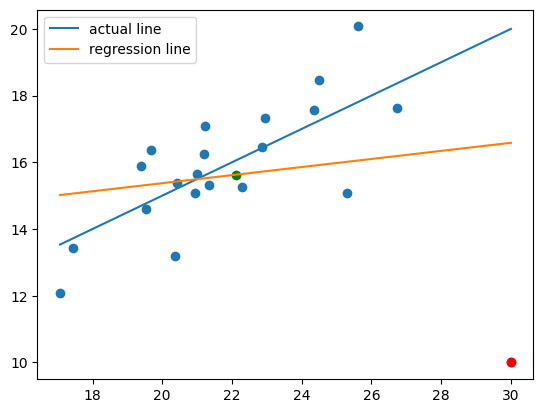

In [ ]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print("The rsquared value is " + str(lm4.rsquared))

plt.scatter(np.sort(x4), y4[np.argsort(x4)])
plt.scatter(30, 10, color = "red")
plt.scatter(np.mean(x4), np.mean(y4), color = "green")
plt.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
plt.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
plt.legend()
plt.plot()

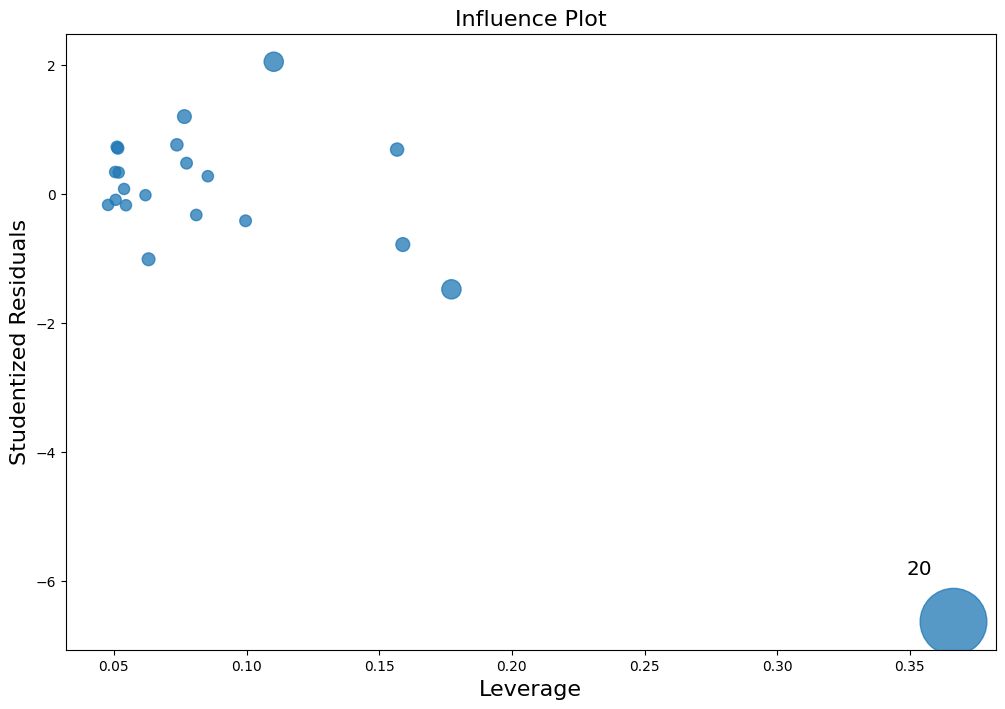

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm4, ax= ax, criterion="cooks")

Let's look at Anscombe's Quartet:

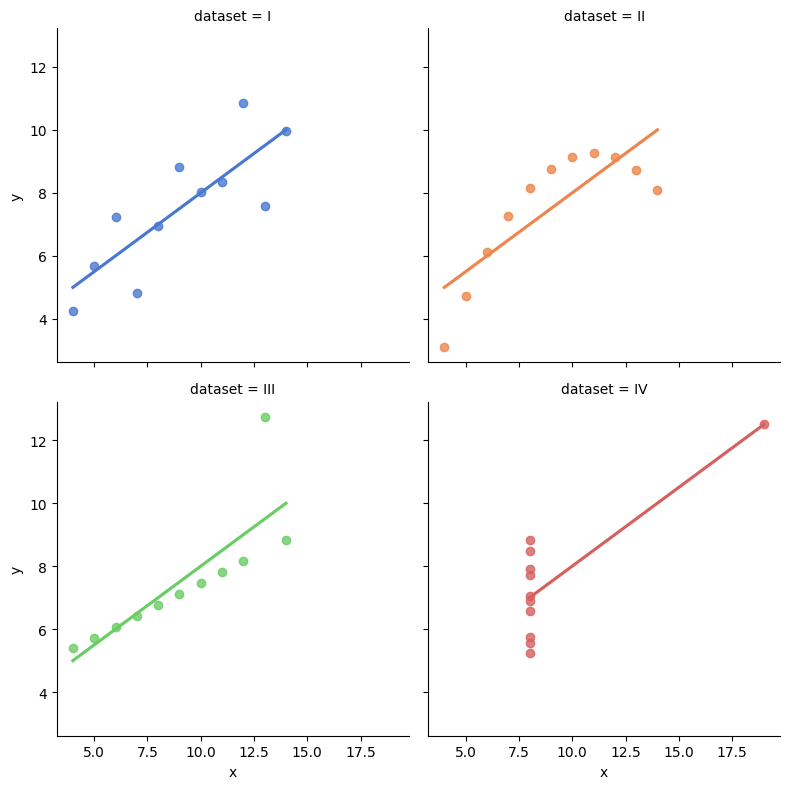

In [ ]:
anscombe = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4)

In [ ]:
anscombe.sample(10)


,dataset,x,y
29,III,4.0,5.39
37,IV,8.0,8.47
10,I,5.0,5.68
31,III,7.0,6.42
8,I,12.0,10.84
27,III,14.0,8.84
22,III,10.0,7.46
7,I,4.0,4.26
39,IV,8.0,5.25
34,IV,8.0,5.76


In [ ]:
anscombe_1 = anscombe[anscombe.dataset == 'I']
anscombe_2 = anscombe[anscombe.dataset == 'II']
anscombe_3 = anscombe[anscombe.dataset == 'III']
anscombe_4 = anscombe[anscombe.dataset == 'IV']

The rsquared value is 0.666542459508775


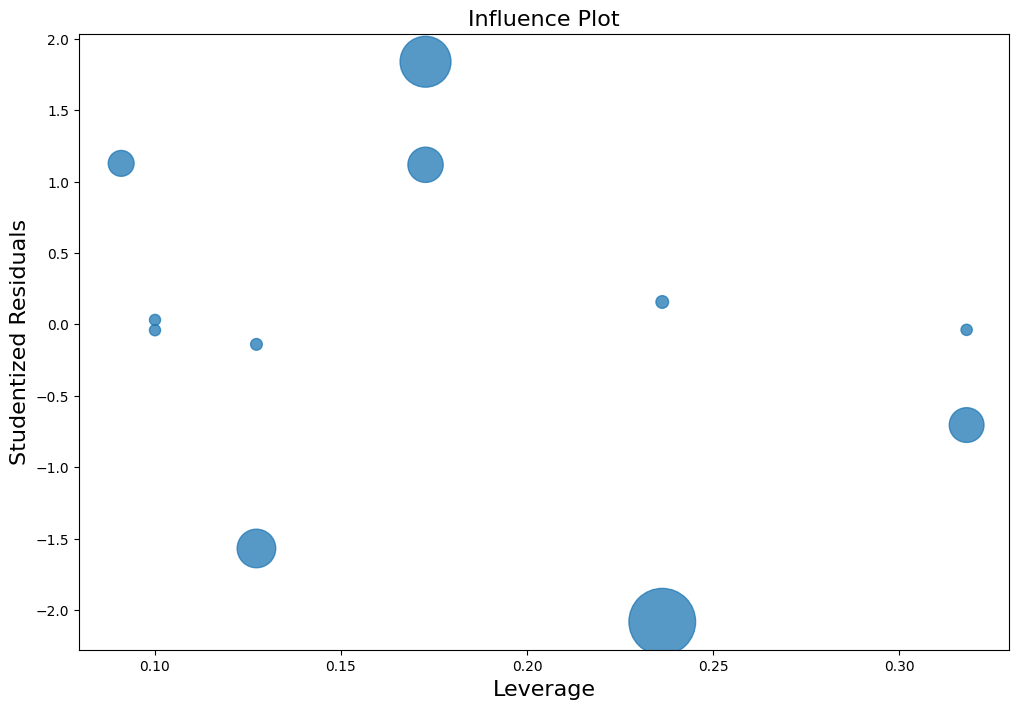

In [ ]:
anscombe_1_lm = smf.ols('y ~ x',anscombe_1).fit()
print("The rsquared value is " + str(anscombe_1_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_1_lm, ax= ax, criterion="cooks",alpha=0.05)

The rsquared value is 0.6662420337274844


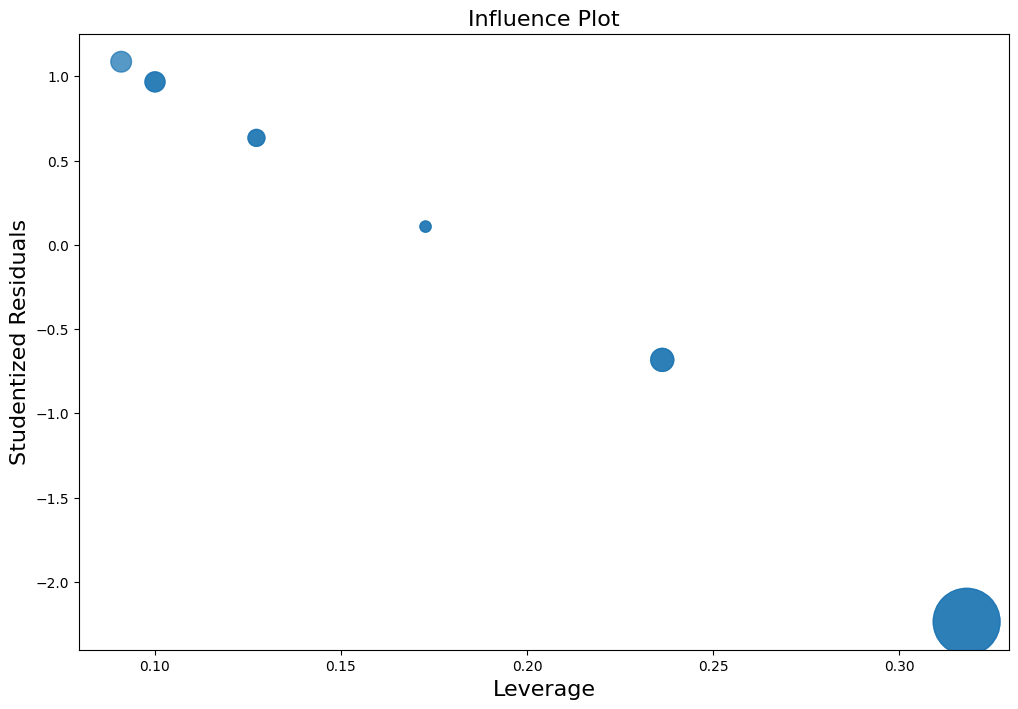

In [ ]:
anscombe_2_lm = smf.ols('y ~ x',anscombe_2).fit()
print("The rsquared value is " + str(anscombe_2_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_2_lm, ax= ax, criterion="cooks",alpha=.05)

The rsquared value is 0.6663240410665594


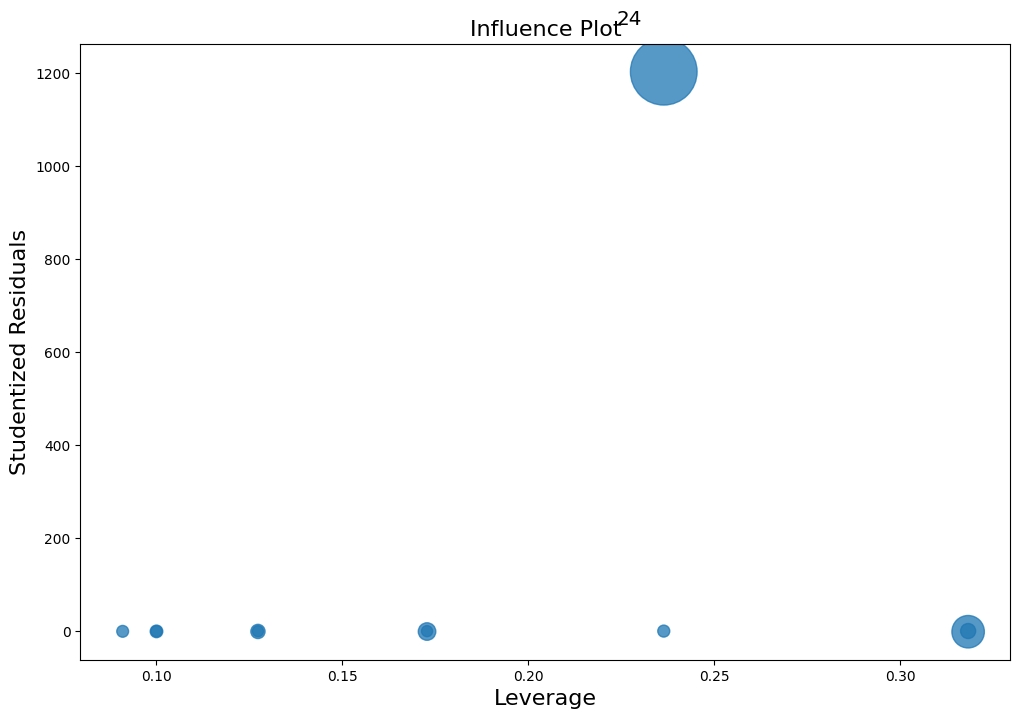

In [ ]:
anscombe_3_lm = smf.ols('y ~ x',anscombe_3).fit()
print("The rsquared value is " + str(anscombe_3_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_3_lm, ax= ax, criterion="cooks",alpha=0.05)

In [ ]:
anscombe_4.head(10)

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


The rsquared value is 0.6667072568984653


/Users/anupamabhatta/Desktop/pwd/SI 618/SI_618_WN_24_Files/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)
/Users/anupamabhatta/Desktop/pwd/SI 618/SI_618_WN_24_Files/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:868: RuntimeWarning: divide by zero encountered in divide
  cooks_d2 *= hii / (1 - hii)
/Users/anupamabhatta/Desktop/pwd/SI 618/SI_618_WN_24_Files/.venv/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:884: RuntimeWarning: invalid value encountered in divide
  psize = (psize - psize.min()) * new_range/old_range + 8**2


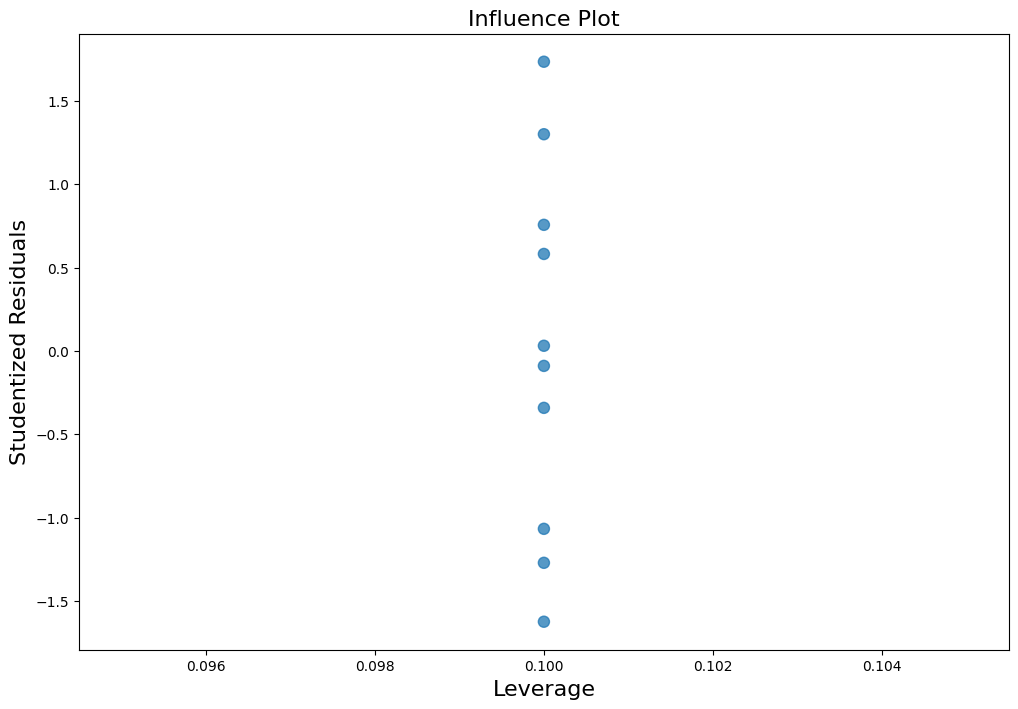

In [ ]:
anscombe_4_lm = smf.ols('y ~ x',anscombe_4).fit()
print("The rsquared value is " + str(anscombe_4_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
# note that the following line will result in warnings about the data
fig = sm.graphics.influence_plot(anscombe_4_lm, ax= ax, criterion="cooks",alpha=0.05)


In [ ]:
infl = anscombe_3_lm.get_influence()
sm_fr = infl.summary_frame()
sm_fr

,dfb_Intercept,dfb_x,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
22,-0.004626,-4.412673e-02,0.011765,-0.460177,0.100000,-0.153392,-0.439055,-0.146352
23,-0.037133,1.864368e-02,0.002141,-0.196333,0.100000,-0.065444,-0.185502,-0.061834
24,-357.909597,5.252677e+02,1.392849,2.999992,0.236364,1.669041,1203.539464,669.587544
25,-0.032900,1.340142e-15,0.005473,-0.330851,0.090909,-0.104624,-0.313844,-0.099246
26,0.049155,-1.172274e-01,0.025984,-0.596951,0.127273,-0.227964,-0.574295,-0.219312
27,0.489742,-6.674064e-01,0.300571,-1.134972,0.318182,-0.775333,-1.155982,-0.789686
28,0.027001,-2.088417e-02,0.000518,0.070416,0.172727,0.032176,0.066407,0.030344
29,0.240903,-2.089150e-01,0.033817,0.380699,0.318182,0.260067,0.361851,0.247192
30,0.137434,-2.313597e-01,0.059536,-0.755177,0.172727,-0.345068,-0.735677,-0.336158
31,-0.019702,1.342485e-02,0.000355,-0.069739,0.127273,-0.026632,-0.065768,-0.025116


We can also extract the Cook's Distance values and their associated p-values from the influence object:

In [ ]:
c,p = infl.cooks_distance

and create a DataFrame with the results

In [ ]:
df = pd.DataFrame.from_dict({'cooks_distance':c,'pvalue':p})
df

,cooks_distance,pvalue
0,0.011765,0.988319
1,0.002141,0.997861
2,1.392849,0.297161
3,0.005473,0.994545
4,0.025984,0.974424
5,0.300571,0.747547
6,0.000518,0.999483
7,0.033817,0.966870
8,0.059536,0.942570
9,0.000355,0.999645


Note that we could sort the above in various, helpful ways.

## ANOVA (ANalysis Of VAriance)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Pizza Dough Recipes

From https://dasl.datadescription.com/datafile/activating-baking-yeast/?_sfm_methods=Analysis+of+Variance&_sfm_cases=4+59943

> To shorten the time it takes him to
make his favorite pizza, a student designed an experiment to
test the effect of sugar and milk on the activation times for
baking yeast. Specifically, he tested four different recipes and
measured how many seconds it took for the same amount of
dough to rise to the top of a bowl. He randomized the order
of the recipes and replicated each treatment 4 times.

Let's go ahead and read in the data/activating-baking-yeast.txt file into a DataFrame called ```yeast```

In [ ]:
yeast = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/activating-baking-yeast.txt',sep='\t')

As usual, inspect the DataFrame so we know what we're dealing with:

In [ ]:
yeast.head()

,Activation Times,Recipe
0,575,A
1,395,A
2,280,B
3,120,B
4,720,C


In [ ]:
yeast.columns

Index(['Activation Times', 'Recipe '], dtype='object')

Those column names aren't nice to work with, so let's go ahead and rename them
to ```activation``` and ```recipe```

In [ ]:
to_be_renamed = {"Activation Times" :"activation", "Recipe ": "recipe"}
yeast = yeast.rename(columns = to_be_renamed)  

In [ ]:
yeast.head()

,activation,recipe
0,575,A
1,395,A
2,280,B
3,120,B
4,720,C


Let's start by visually examining our data:

#### Challenge: 
Consider the following boxplot.  What can you infer about the effect of recipe on the activation times for baking yeast?

<Axes: xlabel='recipe', ylabel='activation'>

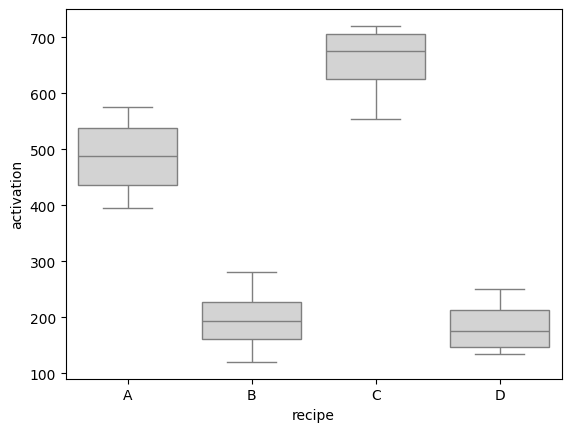

In [ ]:
sns.boxplot(x="recipe",y="activation", data=yeast, color = "lightgray")

From the boxplot, we can infer that recipe C has the highest activation time, followed then by recipe A. We can also infer that recipes B and D have similar activation times, although recipe B has a slightly higher activation time compare to recipe D.

## Let's do an ANOVA!
We want to know if the above differences are statistically "real".  In other words, 
we want to know if the activation times vary according to the recipes. We can use ANOVA to test this. The null hypothesis is that the means of the groups are equal.  The alternative hypothesis is that at least one group mean is different from the others.

We use statsmodels.forumula.api to create the model in a "readable" way.  For example, 
```activation ~ recipe``` would do that for us.  So we're going to create a model,
fit it to the data, and examine it.  

In [ ]:
yeast_lm = ols('activation ~ recipe', data=yeast).fit()
table = sm.stats.anova_lm(yeast_lm, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
recipe,638967.6875,3.0,44.739175,8.639741e-07
Residual,57128.2500,12.0,NaN,NaN


A note about that "typ=2" (from https://www.r-bloggers.com/2011/03/anova-%E2%80%93-type-iiiiii-ss-explained/): 
> NOTE: when data is balanced, the factors are orthogonal, and types I, II and III all give the same results.
Summary: Usually the hypothesis of interest is about the significance of one factor while controlling for the level of the other factors. This equates to using type II or III SS. In general, if there is no significant interaction effect, then type II is more powerful, and follows the principle of marginality. If interaction is present, then type II is inappropriate while type III can still be used, but results need to be interpreted with caution (in the presence of interactions, main effects are rarely interpretable).

### What does that tell us?

Where do all those numbers come from?  Let's walk through an ANOVA by hand:
(this material based on https://jooskorstanje.com/1_Way_ANOVA_Pizza_Delivery.html)

In [ ]:
yeast.head()

,activation,recipe
0,575,A
1,395,A
2,280,B
3,120,B
4,720,C


In [ ]:
yeast.groupby('recipe').mean()

,activation
recipe,
A,486.25
B,196.25
C,656.00
D,183.75


In [ ]:
# compute overall mean

overall_mean = yeast['activation'].mean()
overall_mean

380.5625

In [ ]:
# compute sum of squares total
yeast['overall_mean'] = overall_mean
ss_total = sum((yeast['activation'] - yeast['overall_mean'])**2)
ss_total

696095.9375

In [ ]:
# compute group means
group_means = yeast.groupby('recipe').mean()
group_means = group_means.rename(columns = {'activation': 'group_mean'})
group_means

,group_mean,overall_mean
recipe,,
A,486.25,380.5625
B,196.25,380.5625
C,656.00,380.5625
D,183.75,380.5625


In [ ]:
# add group means and overall mean to the original data frame
yeast = yeast.merge(group_means['group_mean'], left_on = 'recipe', right_index = True)
yeast

,activation,recipe,overall_mean,group_mean
0,575,A,380.5625,486.25
1,395,A,380.5625,486.25
8,525,A,380.5625,486.25
9,450,A,380.5625,486.25
2,280,B,380.5625,196.25
3,120,B,380.5625,196.25
10,175,B,380.5625,196.25
11,210,B,380.5625,196.25
4,720,C,380.5625,656.00
5,554,C,380.5625,656.00


In [ ]:
# compute sum of squares residual
ss_residual = sum((yeast['activation'] - yeast['group_mean'])**2)
ss_residual

57128.25

In [ ]:
# compute Sum of Squares Model
ss_explained = sum((yeast['overall_mean'] - yeast['group_mean'])**2)
ss_explained

638967.6875

In [ ]:
# compute Mean Square Residual
n_groups = len(set(yeast['recipe']))
n_obs = yeast.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

4760.6875

In [ ]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

212989.22916666666

In [ ]:
# compute F-Value
f = ms_explained / ms_residual
f

44.739174576501114

In [ ]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

8.63974071951823e-07

In [ ]:
# (from our ANOVA way above)
table

,sum_sq,df,F,PR(>F)
recipe,638967.6875,3.0,44.739175,8.639741e-07
Residual,57128.2500,12.0,NaN,NaN


Note that this is just a simplified version of the more detailed output using the `summary()` method. 

In [ ]:
model = smf.ols('activation ~ recipe', data=yeast).fit()
model.summary()

/Users/anupamabhatta/Desktop/pwd/SI 618/SI_618_WN_24_Files/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             activation   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     44.74
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           8.64e-07
Time:                        14:56:51   Log-Likelihood:                -88.147
No. Observations:                  16   AIC:                             184.3
Df Residuals:                      12   BIC:                             187.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     486.2500     34.499     14.095      0.000     411.083     561.417
recipe[T.B]  -290.0000     48.789     -5.944      0.000    -396.302    -183.698
recipe[T.C]   169.7500     48.789      3.479      0.005      63.448     276.052
recipe[T.D]  -302.5000     48.789     -6.200      0.000    -408.802    -196.198
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   3.169
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                0.964
Skew:                          -0.142   Prob(JB):                        0.618
Kurtosis:                       1.832   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Tukey's Honestly Significant Differences (HSD)

Ok, so we know there are significant differences between the different recipes, but
which one(s) are different from other ones?  To answer that, we can use Tukey's HSD (Honestly Sigificant Differences):

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
res2 = pairwise_tukeyhsd(yeast['activation'], yeast['recipe'])
res2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-290.0,0.0003,-434.849,-145.151,True
A,C,169.75,0.0205,24.901,314.599,True
A,D,-302.5,0.0002,-447.349,-157.651,True
B,C,459.75,0.0,314.901,604.599,True
B,D,-12.5,0.9938,-157.349,132.349,False
C,D,-472.25,0.0,-617.099,-327.401,True


## BREAK

## In-class coding

### Correlation and regression

#### Challenge: List the 5 largest correlations in the wine quality dataset

Feeling ambitious?  Try to get the following output:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>var1</th>
      <th>var2</th>
      <th>corr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12</th>
      <td>fixed acidity</td>
      <td>pH</td>
      <td>-0.682978</td>
    </tr>
    <tr>
      <th>14</th>
      <td>citric acid</td>
      <td>fixed acidity</td>
      <td>0.671703</td>
    </tr>
    <tr>
      <th>16</th>
      <td>density</td>
      <td>fixed acidity</td>
      <td>0.668047</td>
    </tr>
    <tr>
      <th>18</th>
      <td>free sulfur dioxide</td>
      <td>total sulfur dioxide</td>
      <td>0.667666</td>
    </tr>
    <tr>
      <th>20</th>
      <td>citric acid</td>
      <td>volatile acidity</td>
      <td>-0.552496</td>
    </tr>
  </tbody>
</table>

In [ ]:
corr = wine.corr()
corr = corr.stack().to_frame().reset_index() # convert the correlation matrix to a dataframe
corr = corr.sort_values(by=0,key=lambda col:abs(col),ascending=False) # sort by absolute value
corr = corr.rename(columns={'level_0':'var1','level_1':'var2',0:'corr'}) # rename the columns
corr = corr.drop_duplicates('corr') # drop duplicate rows
corr = corr[corr['var1'] !=corr['var2']] # drop rows where the variables are the same
corr.head(5)

,var1,var2,corr
8,fixed acidity,pH,-0.682978
2,fixed acidity,citric acid,0.671703
7,fixed acidity,density,0.668047
77,total sulfur dioxide,free sulfur dioxide,0.667666
14,volatile acidity,citric acid,-0.552496


#### Challenge: Create a JointGrid-based plot that contains a regplot and a histplot for "free sulphur dioxide" vs. "total sulphur dioxide".

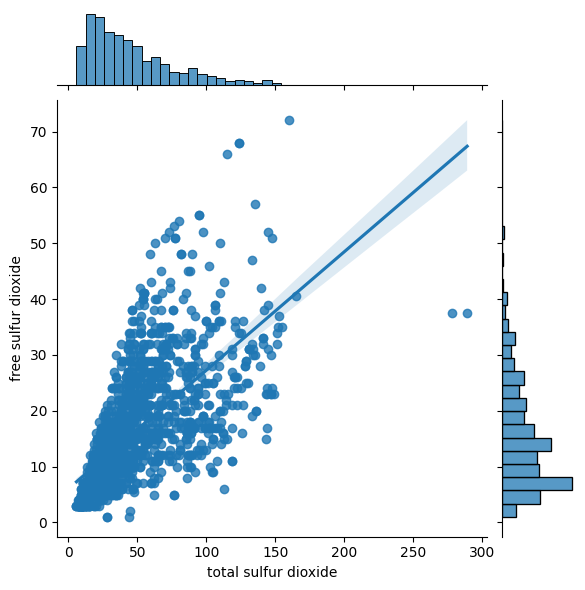

In [ ]:
g = sns.JointGrid(data=wine, x="total sulfur dioxide", y = "free sulfur dioxide") # create a JointGrid
g.plot(sns.regplot, sns.histplot) # plot the regression and histograms

#### Challenge: Create a regression model with "total sulfur dioxide" as the dependent variable and "free sulfur dioxide" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

In [208]:
model = smf.ols('Q("total sulfur dioxide") ~ Q("free sulfur dioxide")', data=wine).fit() # fit the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q("total sulfur dioxide")   R-squared:                       0.446
Model:                                   OLS   Adj. R-squared:                  0.445
Method:                        Least Squares   F-statistic:                     1285.
Date:                       Wed, 07 Feb 2024   Prob (F-statistic):          6.40e-207
Time:                               16:20:28   Log-Likelihood:                -7382.4
No. Observations:                       1599   AIC:                         1.477e+04
Df Residuals:                           1597   BIC:                         1.478e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.1354      1.114     11.795      0.000      10.951      15.320
Q("free sulfur dioxide")     2.0997      0.059     35.840      0.000       1.985       2.215
==============================================================================
Omnibus:                      621.223   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.294
Skew:                           1.767   Prob(JB):                         0.00
Kurtosis:                       8.915   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
model.predict({'free sulfur dioxide':60})

0    139.116852
dtype: float64

In [211]:
60 * 2.0997 + 13.1354

139.1174

This regression is **statistically significant** because the p-value associated with the F-statistic is extremely low (6.40e-207), indicating strong evidence against the null hypothesis that all coefficients are zero.

### ANOVA

For this section, we draw our inspiration from the FiveThirtyEight article "‘Straight Outta Compton’ Is The Rare Biopic Not About White Dudes" (https://fivethirtyeight.com/features/straight-outta-compton-is-the-rare-biopic-not-about-white-dudes/).  FiveThiryEight has a great habit of publishing the data
that underpin their stories and those data are available via GitHub so it's easy to 
load them into a DataFrame:

In [ ]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv"

In [ ]:
biopics = pd.read_csv(url,encoding="latin1")

In [ ]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


We're interested in the 'box_office' variable, which is an oddly-formatted representation of the box-office earnings for each movie.  We're going to create a function that 
converts representations like '$56.7M' to '56700000'.  How?

#### Challenge:
Write a function called `convert_box_office` that takes a string as input and returns a float.  The function should:

1. Remove the dollar sign
2. Remove the 'M' or 'K' at the end of the string
3. Convert the string to a float
4. Multiply the float by 1,000,000 (if there was an 'M' at the end of the string) or 1,000 (if there was a 'K' at the end of the string)
5. Return the result or return an NaN if the input is not a valid box office revenue value

You may find the `re` library helpful for this task.  Or not.


In [ ]:
import re

def box_office_dollars(earnings):
    if earnings == "-":
        return np.nan
    if earnings[-1] == "K":
        return float(earnings[1:-1])*1000
    if earnings[-1] == "M":
        return float(earnings[1:-1])*1000000
    if earnings[-1] == "B":
        return float(earnings[1:-1])*1000000000
    else:
        return float(earnings[1:])

# Test out your function using assert statements
assert(box_office_dollars("$1") == 1.0)
assert(box_office_dollars("$537K") == 537000.0)
assert(box_office_dollars("$1M") == 1000000.0)
assert(np.isnan(box_office_dollars("-")))

And apply it to our DataFrame, creating a new column called 'box_office_dollars'

In [ ]:
biopics['box_office_dollars'] = biopics['box_office'].apply(box_office_dollars)

In [ ]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0


#### Challenge: What should we do with our missing values:

In [ ]:
# drop the missing values
biopics.dropna(inplace=True)

As always, let's take a look at the distribution of our variable:


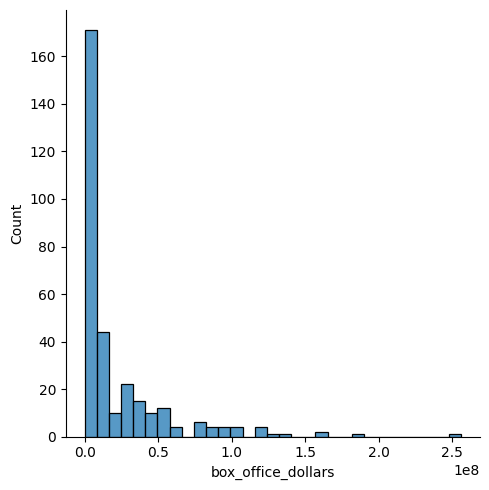

In [ ]:
sns.displot(biopics['box_office_dollars'])

Hmmmm.  That doesn't look good (why?) . 

Let's see if we can make that look a bit more like a normal distribution.  Let's 
apply a log transform:

In [ ]:
biopics['log_box_office_dollars'] = np.log(biopics['box_office_dollars'])

In [ ]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars,log_box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0,17.853285
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0,18.212426
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0,13.937728
7,42,http://www.imdb.com/title/tt0453562/,US,2013,$95M,Brian Helgeland,1,Jackie Robinson,Athlete,Known,African American,1,Male,Chadwick Boseman,95000000.0,18.369387
12,A Dangerous Method,http://www.imdb.com/title/tt1571222/,Canada/UK,2011,$5.7M,David Cronenberg,3,Carl Gustav Jung,Academic,Known,White,0,Male,Michael Fassbender,5700000.0,15.555977


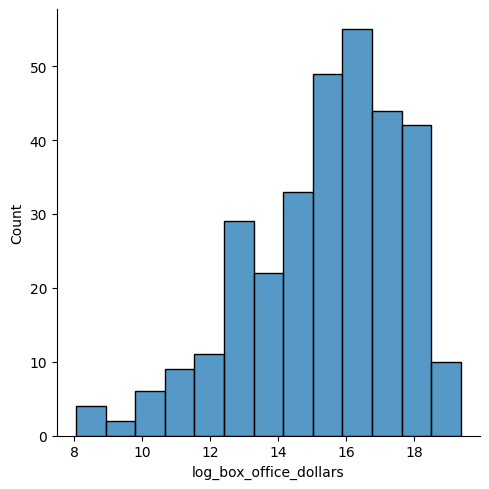

In [ ]:
sns.displot(biopics['log_box_office_dollars'])

#### Challenge: 
Use a boxplot to look at the relationship of log(box_office_dollars) and whether the subject of the biopic was a person of color or not. Does it look like there's a difference between the two groups?

<Axes: xlabel='person_of_color', ylabel='log_box_office_dollars'>

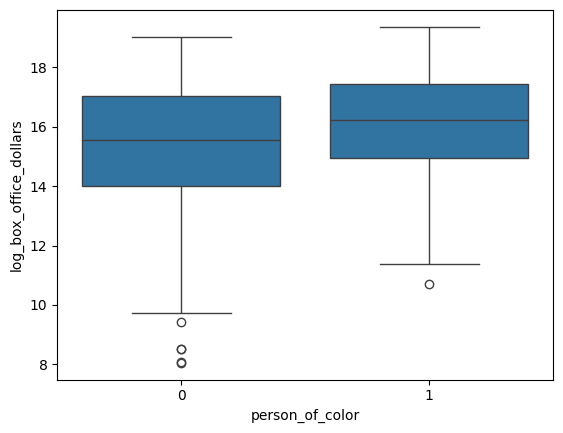

In [ ]:
# insert your code here
sns.boxplot(data=biopics,x='person_of_color',y='log_box_office_dollars')

It does not look like there is a big difference between the two box plots, but I would need to analyze more variables to be certain.

## The t-test

To test if there's a statistically significant difference between *two* means, we
can use the independent sample t-test.  First, load up the right package:

In [ ]:
from scipy.stats import ttest_ind

It's more readable if we split the data into two samples:

In [ ]:
poc = biopics[biopics["person_of_color"] == 1]
not_poc = biopics[biopics["person_of_color" ] == 0]

In [ ]:
ttest_ind(poc["log_box_office_dollars"],not_poc["log_box_office_dollars"])

TtestResult(statistic=nan, pvalue=nan, df=nan)


#### Challenge: What does that mean?

Insert your interpretations here

Things get a bit more complicated when we have more than two groups.  We could, of course, do a bunch of t-tests, but that's not a great idea (why?).  Instead, we can use ANOVA to test if there are any differences between the means of the groups.  If we find that there are differences, we can use Tukey's HSD to figure out which groups are different from which other groups.

In [ ]:
biopics.subject_race.value_counts().sort_index()

subject_race
African                        9
African American              35
Asian                          5
Asian American                 3
Caribbean                      2
Eurasian                       1
Hispanic (Latin American)     13
Hispanic (Latina)              1
Hispanic (Latino)              6
Hispanic (White)               6
Indian                         2
Mediterranean                  1
Middle Eastern                11
Middle Eastern (White)        13
Multi racial                  24
Native American                4
White                        428
Name: count, dtype: int64

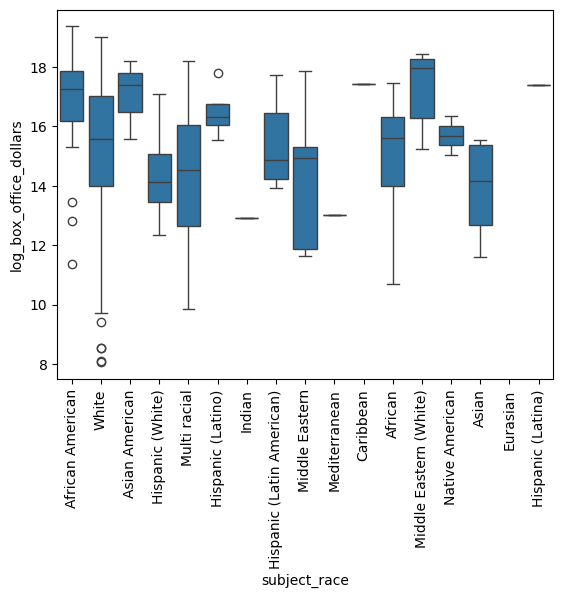

In [ ]:
sns.boxplot(x="subject_race",y="log_box_office_dollars",data=biopics)
_ = plt.xticks(rotation=90)

It looks like there may be some differences between the different groups.  But are they real?

#### Challenge: 
Use ANOVA to test if there are any differences between the means of the different groups.  If you find that there are differences, use Tukey's HSD to figure out which groups are different from which other groups.

In [ ]:
# insert your code here

#### Challenge:
Is there a statistically significant difference? Which groups are different from which other groups?

Insert your interpretation here.

#### Challenge:

Download the chocolate bars rating dataset from https://www.kaggle.com/rtatman/chocolate-bar-ratings.

Use the data to answer the following questions:
1. Is there a statistically significant difference in the average rating of chocolate bars from different countries (use the country of manufacture)?  If yes, which countries are different from each other?
2. Explore other variables in the dataset.  Is there anything else interesting you can find?

Use as many code and markdown cells as you need to answer the questions.

## Remember to submit your notebook in .ipynb and .html formats via Canvas